This notebook explores an example using data from the ENIGMA Addiction Consortium. Within this notebook we will be trying to predict between participents with any drug dependence (alcohol, cocaine, etc...), vs. healthy controls. The data for this is sources from a number of individual studies from all around the world and with different scanners etc... making this a challenging problem with its own unique considerations. Freesurfer structural ROIs are used.

In [1]:
from BPt import BPt_ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will start by just performing some very dataset specific loading.

In [2]:
d1 = pd.read_excel('/home/sage/Downloads/e1.xlsx')
d2 = pd.read_excel('/home/sage/Downloads/e2.xlsx')
df = pd.concat([d1, d2])

df['Subject'] = df['Subject'].astype('str')

df2 = pd.read_excel('/home/sage/Downloads/e3.xlsx')
df2['Subject ID'] = df2['Subject ID'].astype('str')

Next we set up our BPt_ML object and set some default loading params.

In [3]:
ML = BPt_ML('Enigma_Alc',
             log_dr = None,
             n_jobs = 8)

ML.Set_Default_Load_Params(subject_id = 'Subject',
                           na_values = [' ', '  ', 'nan', 'NaN'],
                           drop_na = .5)

exp_name = Enigma_Alc
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 534
n_jobs = 8
dpi = 100
mp_context = loky
BPt_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: Subject
eventname: None
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: [' ', '  ', 'nan', 'NaN']
drop_na: 0.5
drop_or_na: drop



Next we will load and visualize the neuroimaging freesurfer ROIs

In [4]:
ML.Load_Data(df = df,
             drop_keys = ['Unnamed:', 'Site', 'Half', 'PI', 'Dependent',
                          'Surface Area', 'Thickness', 'ICV', 'Subcortical',
                          'Sex', 'Age', 'Primary Drug'],
             inclusion_keys = None,
             unique_val_warn=None,
             clear_existing=True)

ML.Show_Data_Dist()

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Cleared loaded data.

Loading from df or files

Dropped 55 columns per passed drop_keys argument
Dropped 0 cols for all missing values
Dropped 38 rows for missing values, based on the provided drop_na param: 0.5 with actual na_thresh: 77
Loaded rows with NaN remaining: 508
Loaded NaN Info:
There are: 8937 total missing values
17 columns found with 3 missing values (column name overlap: ['_thickavg'])
14 columns found with 4 missing values (column name overlap: ['_thickavg'])
13 columns found with 103 missing values (column name overlap: ['_surfavg'])
11 columns found with 102 missing values (column name overlap: ['urf'])
10 columns found with 5 missing values (column name overlap: ['_thickavg'])
8 columns found with 104 missing values (column name overlap: ['_surfavg'])
6 columns found with 105 missing values (column name overlap: ['_surfavg'])
6 columns found with 101 missing values (column name overlap: ['urf'])
6 columns found with 106 missing values (column name overlap: ['_surfavg

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpnagupf0b/temp.m4v


Our target variable is drug dependence

Loading from df or files
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: 0.5 with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: Dependent any drug

Loaded Shape: (3046, 1)
All loaded targets
0 : Dependent any drug

Set to overlapping loaded subjects.
-- Dependent any drug --


Original_Name  Counts  Frequency
Internal_Name                                  
0                          0    1102   0.366356
1                          1    1906   0.633644

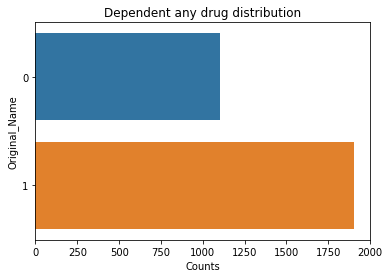

In [5]:
ML.Load_Targets(df = df,
                col_name = 'Dependent any drug',
                data_type = 'b')
ML.Show_Targets_Dist()

We will load the rest of the non neuroimaging data as Covars according to their data type

cleared covars.

Loading from df or files
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 111
loading: ICV
loading: Sex
loading: Age
Loaded Shape: (3046, 3)
Loading from df or files
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 1314
loading: Education
Filtering for outliers by stds: (10, 10)
Min-Max value (pre-filter): 1.0 135.0
Min-Max value (post outlier filtering): 1.0 33.0
loading: Handedness
Dropped 1 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Loaded Shape: (3420, 2)
Merged with existing (merge=inner)
New combined shape: (2941, 5)
Set to overlapping loaded subjects.
-- ICV --


ICV
count     2899.000
mean        14.744
std          2.322
min          7.476
25%         13.282
50%         14.912
75%         16.400
max         20.700
median      14.912
skew        -0.358
kurtosis    -0.238

Note: 8 subject(s) with NaN not included/shown!


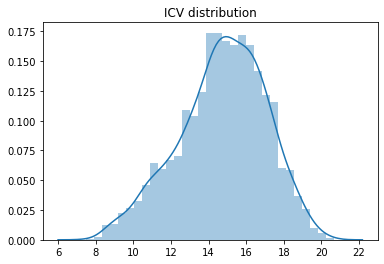


-- Sex --


Original_Name  Counts  Frequency
Internal_Name                                  
0.0                      1.0    1794   0.635044
1.0                      2.0    1031   0.364956

Note: 82 subject(s) with NaN not included/shown!


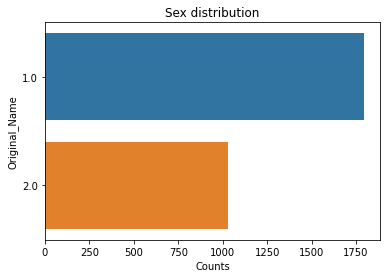


-- Age --


Age
count     2812.000
mean        31.698
std         10.442
min         14.000
25%         23.000
50%         29.000
75%         40.000
max         68.000
median      29.000
skew         0.607
kurtosis    -0.731

Note: 95 subject(s) with NaN not included/shown!


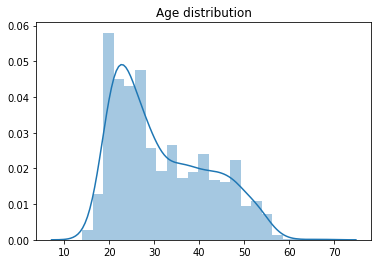


-- Education --


Education
count      2250.000
mean         13.118
std           3.923
min           1.000
25%          12.000
50%          13.000
75%          16.000
max          33.000
median       13.000
skew         -1.187
kurtosis      2.938

Note: 657 subject(s) with NaN not included/shown!


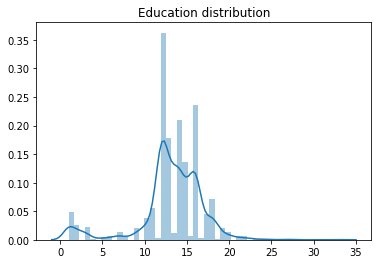


-- Handedness --


Original_Name  Counts  Frequency
Internal_Name                                  
0.0                      1.0    2256   0.958369
1.0                      2.0      98   0.041631

Note: 553 subject(s) with NaN not included/shown!


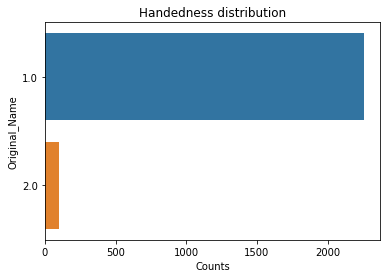

In [6]:
ML.Clear_Covars()

ML.Load_Covars(df=df,
               col_name = ['ICV', 'Sex', 'Age'],
               drop_na = False,
               data_type = ['f', 'b', 'f'])

ML.Load_Covars(df = df2,
               col_name = ['Education', 'Handedness'],
               data_type = ['f', 'b'],
               drop_na = False,
               subject_id = 'Subject ID',
               filter_outlier_std = 10)

ML.Show_Covars_Dist()

We will make use of the Site variable, as a non-input stratification value.

In [7]:
# Also load sex as Strat
ML.Load_Strat(df=df,
              col_name=['Sex', 'Site'],
              binary_col=[True, False]
              )

Loading from df or files
Dropped 0 cols for all missing values
Dropped 85 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (2961, 2)


Calling Prepare_All_Data sets up our data for modelling

In [8]:
ML.Prepare_All_Data()

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (2825, 162)


We can look at how many NaN values we have still present in the data to be imputed.

In [9]:
np.sum(np.sum(ML.all_data.isnull()))

2648

Next we will make use of BPt's CV object to define a custom CV behavior where groups are preserved on Site.

In [10]:
from BPt import CV

group_site_cv = CV(groups='Site')

We can now pass this custom CV object when defining our global train test split, which will inform the train test split by the passed CV behavior

In [11]:
ML.Train_Test_Split(test_size = .2, cv=group_site_cv)

Performing split on 2825 subjects!
random_state: 534
Test split size: 0.2

Performed train test split
Train size: 2117
Test size:  708


Once a train test split has been defined, new visualization functionality is avaliable

Set to overlapping loaded subjects.


Train     Test
ICV                        
count     2111.000  706.000
mean        15.047   13.702
std          2.192    2.412
min          7.476    8.178
25%         13.700   11.705
50%         15.126   13.900
75%         16.600   15.452
max         20.700   20.506
median      15.126   13.900
skew        -0.397   -0.069
kurtosis     0.074   -0.772

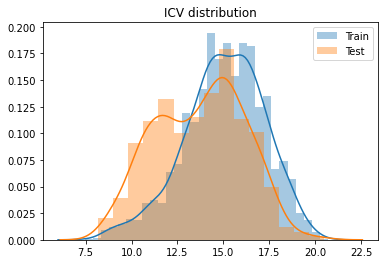

Original_Name  Counts  Frequency  Split
Internal_Name                                         
0.0                      1.0    1367   0.645725  Train
1.0                      2.0     750   0.354275  Train
0.0                      1.0     427   0.603107   Test
1.0                      2.0     281   0.396893   Test

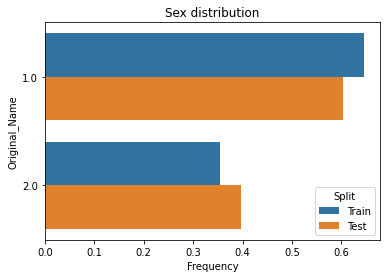

Train     Test
Age                        
count     2103.000  708.000
mean        31.817   31.326
std         10.574   10.032
min         14.000   16.000
25%         23.000   23.000
50%         29.000   29.000
75%         40.000   39.000
max         68.000   59.000
median      29.000   29.000
skew         0.603    0.616
kurtosis    -0.749   -0.688

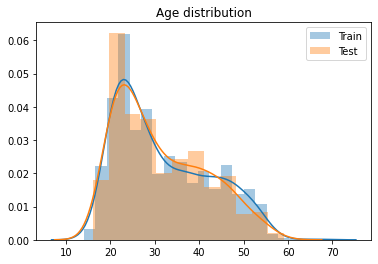

Train     Test
Education                   
count      1773.000  476.000
mean         12.795   14.318
std           4.158    2.556
min           1.000    8.000
25%          12.000   12.000
50%          13.000   14.000
75%          15.580   16.000
max          33.000   26.000
median       13.000   14.000
skew         -1.185    0.938
kurtosis      2.271    1.674

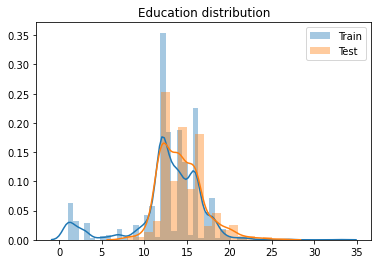

Original_Name  Counts  Frequency  Split
Internal_Name                                         
0.0                      1.0    1615   0.952802  Train
1.0                      2.0      80   0.047198  Train
0.0                      1.0     632   0.973806   Test
1.0                      2.0      17   0.026194   Test

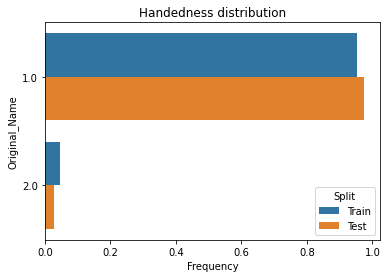

In [12]:
train_dfs = ML.Show_Covars_Dist(subjects='both', cat_type='Frequency', return_display_dfs=True)

Set to overlapping loaded subjects.


Original_Name  Counts  Frequency  Split
Internal_Name                                         
0                          0     634   0.299480  Train
1                          1    1483   0.700520  Train
0                          0     368   0.519774   Test
1                          1     340   0.480226   Test

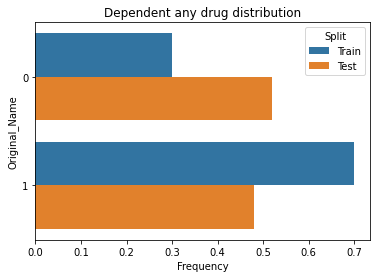

In [13]:
ML.Show_Targets_Dist(subjects='both', cat_type='Frequency')

Plots can be saved (and customized) as seen commented out below

In [14]:
#ML.Show_Targets_Dist(subjects='train', show=False)
#plt.savefig('train_target_dist.png')
#plt.show()
#ML.Show_Targets_Dist(subjects='test', show=False)
#plt.savefig('test_target_dist.png')

In [15]:
ML.Show_Data_Dist(subjects='both')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpm05qc8c9/temp.m4v


Plotting data distribution.
Viewing train data with shape: (2117, 154)
Viewing test data with shape: (708, 154)


## Modelling

The next phase, now that all the data is setup, is to exploreactually modelling

In [16]:
from BPt import Problem_Spec, Model_Pipeline, Imputer, Scaler, Model, Param_Search, Feat_Importance

In [17]:
problem_spec = Problem_Spec(problem_type = 'binary', 
                            scorer = ['matthews', 'roc_auc', 'balanced_accuracy'],
                            n_jobs = 16)
problem_spec               

Problem_Spec(n_jobs=16, problem_type='binary',
             scorer=['matthews', 'roc_auc', 'balanced_accuracy'])

In [18]:
ML.Set_Default_ML_Verbosity(show_init_params=False)

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
progress_loc: None
pipeline_verbose: False
compute_train_score: False
show_init_params: False
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
best_params_score: False
save_to_logs: False
flush: False



In [19]:
model_pipeline =\
    Model_Pipeline(imputers = [Imputer(obj='mean', scope='float'),
                               Imputer(obj='median', scope='cat')],
                   scalers = Scaler('standard'), 
                   model = Model('elastic', params=1),
                   param_search = Param_Search(search_type='DiscreteOnePlusOne', n_iter=64),
                   feat_importances= Feat_Importance(obj='base'))

In [20]:
model_pipeline

Model_Pipeline(feat_importances=Feat_Importance(obj='base', shap_params=None),
               imputers=[Imputer(obj='mean', scope='float'),
                         Imputer(obj='median', scope='cat')],
               model=Model(obj='elastic', params=1),
               param_search=Param_Search(n_iter=64,
                                         search_type='DiscreteOnePlusOne'),
               scalers=Scaler(obj='standard'))

In [21]:
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 3,
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.47921925838200585
Std in Validation score:  0.014796018362789447

Scorer:  roc_auc
Mean Validation score:  0.8194902610380167
Std in Validation score:  0.004213702246671902

Scorer:  balanced_accuracy
Mean Validation score:  0.7567932766942521
Std in Validation score:  0.0074222340419531395



In [22]:
ML.Plot_Global_Feat_Importances()

We can go into a bit more detail and seperate subjects from a site w/ either all control or all case

In [23]:
def check_balanced(df):
    as_int = df['Dependent any drug'].astype('int')
    return np.sum(as_int) != len(as_int)
    
train_data = ML.all_data.loc[ML.train_subjects]
by_site = train_data.groupby('Site_Strat')
is_balanced = by_site.apply(check_balanced)

imbalanced_subjs = []
for b_site in is_balanced[~is_balanced].index:
    imbalanced_subjs += list(train_data[train_data['Site_Strat'] == b_site].index)

balanced_subjs = []
for b_site in is_balanced[is_balanced].index:
    balanced_subjs += list(train_data[train_data['Site_Strat'] == b_site].index)
    print(len(list(train_data[train_data['Site_Strat'] == b_site].index)))

298
41
91
71
53
66
69
137
41
118
30
27
78
59
34


In [24]:
# By defining a CV strategy this way, we are essentially setting a global strategy that will be used
# both in the outer CV folds and inner folds.
ML.Define_Validation_Strategy(train_only_subjects=imbalanced_subjs)

904 Train only subjects defined.


In [25]:
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 3,
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.1480916474122986
Std in Validation score:  0.038933689321310534

Scorer:  roc_auc
Mean Validation score:  0.6204172412035456
Std in Validation score:  0.02348665896552997

Scorer:  balanced_accuracy
Mean Validation score:  0.5719629607690521
Std in Validation score:  0.01970018825592823



## Try w/ removing subjects

In [26]:
problem_spec.subjects = balanced_subjs

In [27]:
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 3,
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.24356071353466655
Std in Validation score:  0.020425752382624663

Scorer:  roc_auc
Mean Validation score:  0.656691530954876
Std in Validation score:  0.005175258248377395

Scorer:  balanced_accuracy
Mean Validation score:  0.6213472020533465
Std in Validation score:  0.009887037789695751



In [28]:
problem_spec.weight_metric = True
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 'Site',
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.13899166862022444
Std in Validation score:  0.20810470176214002

Scorer:  roc_auc
Mean Validation score:  0.615615923779197
Std in Validation score:  0.10357507490796904

Scorer:  balanced_accuracy
Mean Validation score:  0.5654877352204287
Std in Validation score:  0.08735857291198558



In [29]:
problem_spec.subjects = 'all'
results = ML.Evaluate(model_pipeline = model_pipeline,
                      problem_spec = problem_spec,
                      splits = 'Site',
                      n_repeats = 1)




Validation Scores
_________________
Scorer:  matthews
Mean Validation score:  0.1127560583527047
Std in Validation score:  0.11957473259219265

Scorer:  roc_auc
Mean Validation score:  0.5889434342778423
Std in Validation score:  0.08700134193361028

Scorer:  balanced_accuracy
Mean Validation score:  0.5517208532055348
Std in Validation score:  0.05643623482435406

